<a href="https://colab.research.google.com/github/TheNobody-12/Ozone-Prediction-AIProject/blob/main/TimeSeriesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Details of parameters
The parameters you listed appear to be atmospheric pollutants and meteorological variables. Here is a brief description of each of them:

- PM2.5: Fine particulate matter that is 2.5 micrometers or smaller in diameter. It is a common air pollutant that can have negative health effects when inhaled.

- PM10: Coarse particulate matter that is 10 micrometers or smaller in diameter. It is another common air pollutant that can also have negative health effects when inhaled.

- NO: Nitric oxide, a gas that is a precursor to other air pollutants such as nitrogen dioxide and ozone.

- NO2: Nitrogen dioxide, a reddish-brown gas that is a component of smog and can cause respiratory problems.

- NOx: A term used to describe the mixture of nitrogen oxides, including nitric oxide and nitrogen dioxide.

- NH3: Ammonia, a gas that is a common air pollutant in agricultural areas.

- SO2: Sulfur dioxide, a gas that is a component of acid rain and can cause respiratory problems.

- CO: Carbon monoxide, a gas that is produced by incomplete combustion and can be deadly in high concentrations.

- Ozone: A gas that is both a natural and man-made air pollutant. It is formed by the reaction of other pollutants in the presence of sunlight and can cause respiratory problems.

- Benzene: A volatile organic compound that is a component of gasoline and can cause cancer.

- Toluene: A volatile organic compound that is a common solvent and can cause neurological and reproductive problems.

- Eth-Benzene: A volatile organic compound that is used in the production of plastics and can cause respiratory problems.

- MP-Xylene: A volatile organic compound that is used in the production of plastics and can cause neurological and respiratory problems.

- RH: Relative humidity, a measure of the amount of moisture in the air relative to the maximum amount that could be held at a given temperature.

- WD: Wind direction, the direction from which the wind is blowing.

- SR: Solar radiation, the amount of solar energy that reaches the Earth's surface.

- BP: Barometric pressure, the pressure exerted by the atmosphere at a given point.

- AT: Air temperature, the temperature of the air.

- TOT-RF: Total radiative forcing, the balance between incoming solar radiation and outgoing thermal radiation.

- RF: Radiative forcing, the change in net radiation at the top of the atmosphere caused by a change in atmospheric composition or other factors.

- Xylene: A volatile organic compound that is used in the production of plastics and can cause neurological and respiratory problems.

These parameters can be used to understand the air quality and meteorological conditions that may affect the concentration of ozone in the atmosphere. By analyzing trends in these parameters, one can make predictions about the future concentration of ozone and develop strategies to mitigate its negative effects on human health and the environment.






Parameter as per WHO guidelines
[Read more](https://www.c40knowledgehub.org/s/article/WHO-Air-Quality-Guidelines?language=en_US)

In [49]:
!pip install openpyxl

In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot  as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
# from download import download
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [3]:
data = pd.read_excel('F:\IMP_DOCUMENT\College material\SEM6\AIProject\Ozone-Prediction-AIProject\Location\Alipur\FinalData-Alipur.xlsx')

In [4]:
df = data.copy()

In [5]:
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,...,Eth-Benzene,MP-Xylene,RH,WD,SR,BP,AT,RF,Xylene,TOT-RF
0,11-11-2018 00:00,12-11-2018 00:00,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,...,None,None,76.73,240.05,29.55,992.08,19.86,0,0.31,0.0
1,12-11-2018 00:00,13-11-2018 00:00,235.81,340.7,4.97,80.06,46.58,35.29,13.32,1.54,...,None,None,77.34,244.45,107.99,990.39,19.82,0,0.31,0.0
2,13-11-2018 00:00,14-11-2018 00:00,285.09,428.91,16.67,111.32,72.8,41.51,21.87,1.34,...,None,None,78.66,219.97,77.29,988.21,20.48,None,0.91,0.0
3,14-11-2018 00:00,15-11-2018 00:00,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1,...,None,None,77.86,214.38,105.27,989.02,21.22,0.5,0.54,1.0
4,15-11-2018 00:00,16-11-2018 00:00,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,...,None,None,79.27,185.82,112.2,992.52,19.82,None,0.57,0.0


In [6]:
num_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene',
       'RH', 'WD', 'SR', 'BP', 'AT', 'RF', 'Xylene']
# Replace String "None" with NaN
df = df.replace('None', np.nan)
# iterate through the columns and convert to float
for col in num_cols:
    df[col] = df[col].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    1599 non-null   object 
 1   To Date      1599 non-null   object 
 2   PM2.5        1579 non-null   float64
 3   PM10         1583 non-null   float64
 4   NO           1582 non-null   float64
 5   NO2          1582 non-null   float64
 6   Nox          1582 non-null   float64
 7   NH3          1567 non-null   float64
 8   SO2          1566 non-null   float64
 9   CO           1580 non-null   float64
 10  Ozone        1538 non-null   float64
 11  Benzene      1484 non-null   float64
 12  Toluene      1484 non-null   float64
 13  Eth-Benzene  0 non-null      float64
 14  MP-Xylene    6 non-null      float64
 15  RH           1583 non-null   float64
 16  WD           1583 non-null   float64
 17  SR           1583 non-null   float64
 18  BP           1582 non-null   float64
 19  AT    

In [8]:
# Convert the date column to datetime
# datae
df['From Date'] = df['From Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['To Date'] = df['To Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['From Date'].min(), df['From Date'].max()

(Timestamp('2018-11-11 00:00:00'), Timestamp('2023-03-28 00:00:00'))

In [9]:
# drop the columns with more than 50% missing values
df = df.drop(['MP-Xylene','Eth-Benzene','RF'], axis=1)

In [10]:
print("Rows  :  ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())
print("\nMissing values : \n",df.isnull().any())
print("\nUnique values : \n",df.nunique())

Rows  :   1599
Columns :  20

Features : 
 ['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'Xylene', 'TOT-RF']

Missing values : 
 From Date    False
To Date      False
PM2.5         True
PM10          True
NO            True
NO2           True
Nox           True
NH3           True
SO2           True
CO            True
Ozone         True
Benzene       True
Toluene       True
RH            True
WD            True
SR            True
BP            True
AT            True
Xylene        True
TOT-RF       False
dtype: bool

Unique values : 
 From Date    1599
To Date      1594
PM2.5        1522
PM10         1544
NO           1030
NO2          1392
Nox          1369
NH3          1295
SO2          1156
CO            220
Ozone        1375
Benzene       559
Toluene      1182
RH           1337
WD           1508
SR           1508
BP           1134
AT           1173
Xylene        401
TOT-RF         76
dty

In [11]:
df.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
0,2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
1,2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2,2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
3,2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
4,2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [12]:
df.describe()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
count,1579.000000,1583.000000,1582.000000,1582.000000,1582.000000,1567.000000,1566.000000,1580.000000,1538.000000,1484.000000,1484.000000,1583.000000,1583.000000,1583.000000,1582.000000,1582.000000,1482.000000,1599.000000
mean,108.471767,205.273759,12.453710,35.573609,29.069855,23.268839,15.050300,0.987133,29.923433,2.164643,15.792291,60.829084,170.003102,147.695951,986.101643,23.804703,1.724109,1.911382
std,84.729476,124.851800,17.302903,22.220113,22.949496,13.680343,9.459871,0.494471,18.764029,2.455715,18.087923,15.141658,77.204123,55.195871,6.824041,7.575016,9.060354,9.050102
min,4.810000,10.040000,0.490000,0.700000,1.230000,0.480000,2.420000,0.200000,1.220000,0.000000,0.290000,18.200000,37.000000,4.300000,971.260000,5.430000,0.000000,0.000000
25%,45.150000,104.065000,2.540000,18.535000,12.822500,15.175000,8.670000,0.650000,15.615000,0.420000,4.417500,52.490000,98.420000,109.855000,980.090000,17.120000,0.210000,0.000000
50%,82.110000,187.950000,4.825000,31.060000,21.875000,21.430000,12.265000,0.860000,25.825000,1.180000,10.650000,62.830000,163.720000,148.190000,985.750000,25.450000,0.690000,0.000000
75%,147.890000,286.570000,14.895000,47.030000,37.702500,30.150000,19.160000,1.200000,42.327500,3.020000,21.825000,71.910000,240.130000,185.790000,992.180000,30.092500,1.827500,0.000000
max,712.110000,758.400000,155.110000,120.010000,191.260000,117.380000,61.500000,4.880000,106.920000,13.500000,251.420000,97.850000,335.560000,352.070000,999.440000,38.420000,216.560000,169.000000


In [13]:
# save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

In [14]:
aq_df_non_indexed = df.copy()

In [15]:
aq_df = df.set_index('From Date')

In [16]:
aq_df.index

DatetimeIndex(['2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14',
               '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18',
               '2018-11-19', '2018-11-20',
               ...
               '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
               '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
               '2023-03-27', '2023-03-28'],
              dtype='datetime64[ns]', name='From Date', length=1599, freq=None)

In [17]:
aq_df.head()

,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,,
2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0


In [18]:
aq_df.loc['2019-03-01':'2019-03-05']
aq_df.drop(['To Date'],axis=1)

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene,TOT-RF
From Date,,,,,,,,,,,,,,,,,,
2018-11-11,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31,0.0
2018-11-12,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31,0.0
2018-11-13,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91,0.0
2018-11-14,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54,1.0
2018-11-15,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68,1.83,23.58,65.28,110.50,96.65,975.29,21.29,2.27,9.0
2023-03-25,36.00,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54.00,0.76,5.30,62.34,119.21,164.67,977.96,22.28,0.50,1.0
2023-03-26,57.16,152.12,2.01,12.07,8.06,14.60,14.79,1.35,48.79,1.50,7.07,55.15,202.57,200.64,977.53,22.89,0.71,0.0


In [19]:
aq_df.isna().sum() / len(aq_df) * 100

To Date    0.000000
PM2.5      1.250782
PM10       1.000625
NO         1.063164
NO2        1.063164
Nox        1.063164
NH3        2.001251
SO2        2.063790
CO         1.188243
Ozone      3.814884
Benzene    7.191995
Toluene    7.191995
RH         1.000625
WD         1.000625
SR         1.000625
BP         1.063164
AT         1.063164
Xylene     7.317073
TOT-RF     0.000000
dtype: float64

# Saving the data in a csv file

In [20]:
# save the dataframe to a csv file
aq_df.to_csv('ProcessedAlipurData.csv')

# Visualizing the data

In [21]:
pm_data = aq_df['Ozone']
pm_data.head()

From Date
2018-11-11    39.13
2018-11-12    44.63
2018-11-13    31.22
2018-11-14    41.93
2018-11-15    28.81
Name: Ozone, dtype: float64

<AxesSubplot:xlabel='From Date'>

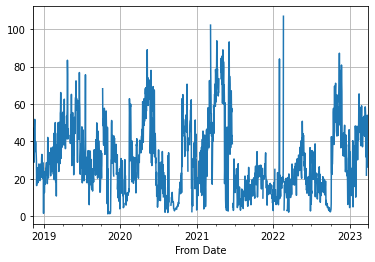

In [22]:
pm_data.plot(grid=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22112\1488866195.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aq_df_2018 = aq_df['2018']


Text(0.5, 1.0, 'Ozone in 2018')

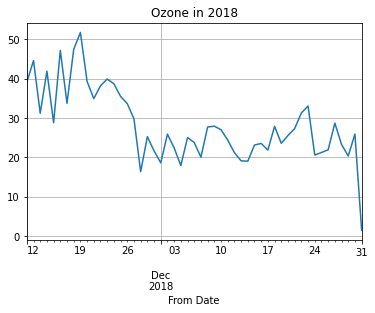

In [23]:
aq_df_2018 = aq_df['2018']
pm_data_2018 = aq_df_2018['Ozone']
pm_data_2018.plot(grid=True)
plt.title('Ozone in 2018')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22112\2379421773.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aq_df_2019 = aq_df['2019']


Text(0.5, 1.0, 'Ozone in 2019')

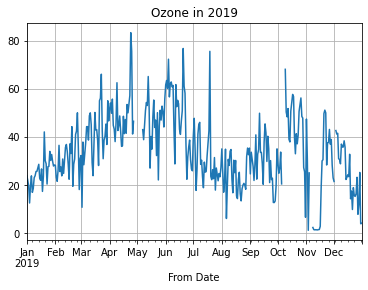

In [24]:
aq_df_2019 = aq_df['2019']
pm_data_2019 = aq_df_2019['Ozone']
pm_data_2019.plot(grid=True)
plt.title('Ozone in 2019')

In [25]:
import plotly.express as px
fig = px.line(aq_df_non_indexed,x = 'From Date',y='Ozone',title='Ozone with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [26]:
fig = px.line(aq_df_non_indexed,x='From Date',y='Ozone',title='Ozone with Slider')

fig.update_xaxes( 
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label="1y",step="month",stepmode="backward"),
            dict(count=2,label="2y",step="month",stepmode="backward"),
            dict(count=3,label="3y",step="year",stepmode="backward"), # YTD = year to date it means from 1st jan to current date
            dict(count=1,label="ytd",step="year",stepmode="todate"),
            dict(step="all")
        ])
    )
)
fig.show()


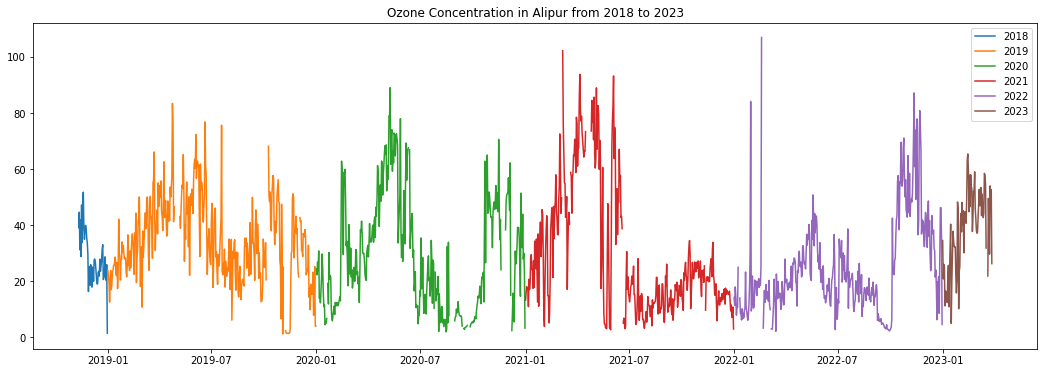

In [27]:
year = ['2018','2019','2020','2021','2022','2023']
# all plots in one figure
plt.figure(figsize=(18,6))
for i in year:
    df_year = aq_df.loc[i]
    plt.plot(df_year['Ozone'],label=i)
plt.legend(loc='best')
plt.title('Ozone Concentration in Alipur from 2018 to 2023')
plt.show()

In [74]:
# i want to group by month
aq_df['month'] = aq_df.index.month
aq_df['year'] = aq_df.index.year
aq_df['day'] = aq_df.index.day
aq_df.head()

,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,...,RH,WD,SR,BP,AT,Xylene,TOT-RF,month,year,day
From Date,,,,,,,,,,,,,,,,,,,,,
2018-11-11,2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,...,76.73,240.05,29.55,992.08,19.86,0.31,0.0,11,2018,11
2018-11-12,2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,...,77.34,244.45,107.99,990.39,19.82,0.31,0.0,11,2018,12
2018-11-13,2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,...,78.66,219.97,77.29,988.21,20.48,0.91,0.0,11,2018,13
2018-11-14,2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,...,77.86,214.38,105.27,989.02,21.22,0.54,1.0,11,2018,14
2018-11-15,2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,...,79.27,185.82,112.20,992.52,19.82,0.57,0.0,11,2018,15


# Month wise analysis of Ozone data with respect to the all year

In [75]:
aq_df.loc['2018':'2023'][['Ozone','month']].groupby('month').describe()

Ozone                                                               
       count       mean        std    min      25%     50%      75%     max
month                                                                      
1      152.0  21.352961  11.112244   4.54  12.3025  21.140  27.8450   84.10
2      139.0  32.245324  16.828838   3.33  18.4750  31.000  43.7850  106.92
3      147.0  35.841156  18.124684   2.17  21.1450  37.130  48.8150  102.18
4      108.0  45.982222  19.911240  11.15  28.2325  44.040  61.5500   93.79
5      118.0  44.898305  20.938777   2.72  31.2275  43.615  61.5675   89.02
6      118.0  36.198136  21.777776   2.80  17.1500  32.435  55.5150   93.20
7      123.0  21.148293  10.866204   3.22  14.3900  20.460  27.1400   75.63
8      115.0  16.113913   8.421419   1.97  10.6650  15.090  20.4600   35.42
9      114.0  14.878070  11.174092   2.32   5.5950  12.170  20.1925   49.90
10     121.0  32.562562  17.829992   2.62  20.3300  27.340  48.5500   71.09
11     130.0  36.009462  18.523064   1.22  23.2400  36.925  47.4575   87.16
12     153.0  24.304837  12.444087   1.50  15.3200  23.260  32.0900   62.23

# Month and Solar Radiation Analysis with respect to the all year

In [76]:
aq_df.loc['2018':'2023'][['Ozone','month','AT','SR','WD']].groupby('month').agg({'Ozone':'max','AT':['min','max'],'SR':['min','max'],'WD':'mean'})

Ozone     AT            SR                  WD
          max    min    max    min     max        mean
month                                                 
1       84.10   5.95  16.88   7.11  175.27  184.140194
2      106.92  10.78  23.10  23.18  195.74  181.559007
3      102.18  14.13  30.56   4.55  255.85  183.361867
4       93.79  22.45  34.80  67.76  352.07  185.037009
5       89.02  22.00  37.34  35.47  285.10  155.195085
6       93.20  26.26  38.42   4.60  252.65  145.312017
7       75.63  26.14  37.05  21.02  301.19  121.483008
8       35.42  25.54  33.97   4.78  268.43  134.575484
9       49.90  24.86  32.24  25.08  231.79  129.361667
10      71.09  19.89  29.65  33.01  208.15  187.138871
11      87.16  13.68  29.15  12.39  195.91  193.113696
12      62.23   5.43  27.26   4.30  164.42  215.626753

## We will see how Temperature,Solar Radiation and Ozone are related to each other for the year 2019

array([<AxesSubplot: xlabel='From Date'>,
       <AxesSubplot: xlabel='From Date'>], dtype=object)

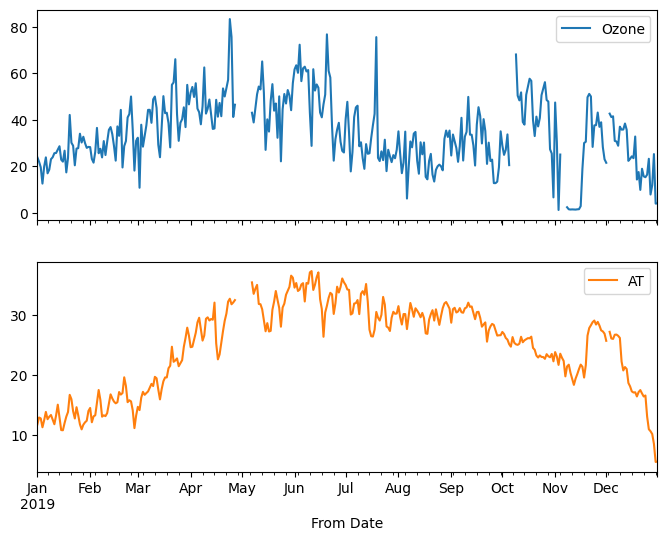

In [77]:
aq_df_2019 = aq_df.loc['2019']
oz_2019 = aq_df_2019[['Ozone','AT']]
oz_2019.plot(subplots=True)

array([<AxesSubplot: xlabel='From Date'>,
       <AxesSubplot: xlabel='From Date'>], dtype=object)

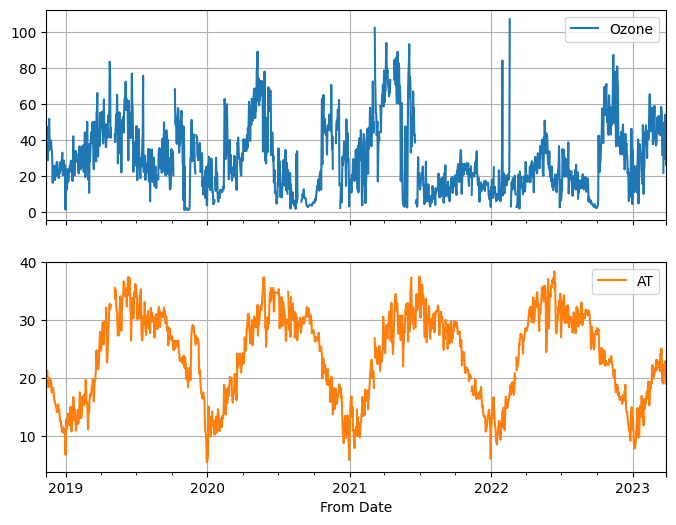

In [78]:
# see plot for every year
aq_df.loc['2018':'2023'][['Ozone','AT']].plot(subplots=True,grid=True)

array([[<AxesSubplot: title={'center': 'Ozone'}>,
        <AxesSubplot: title={'center': 'AT'}>]], dtype=object)

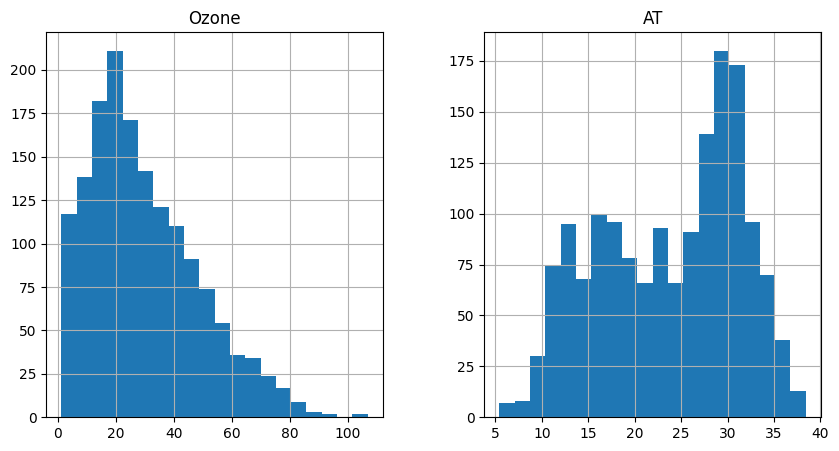

In [79]:
aq_df[['Ozone','AT']].hist(bins=20,figsize=(10,5))

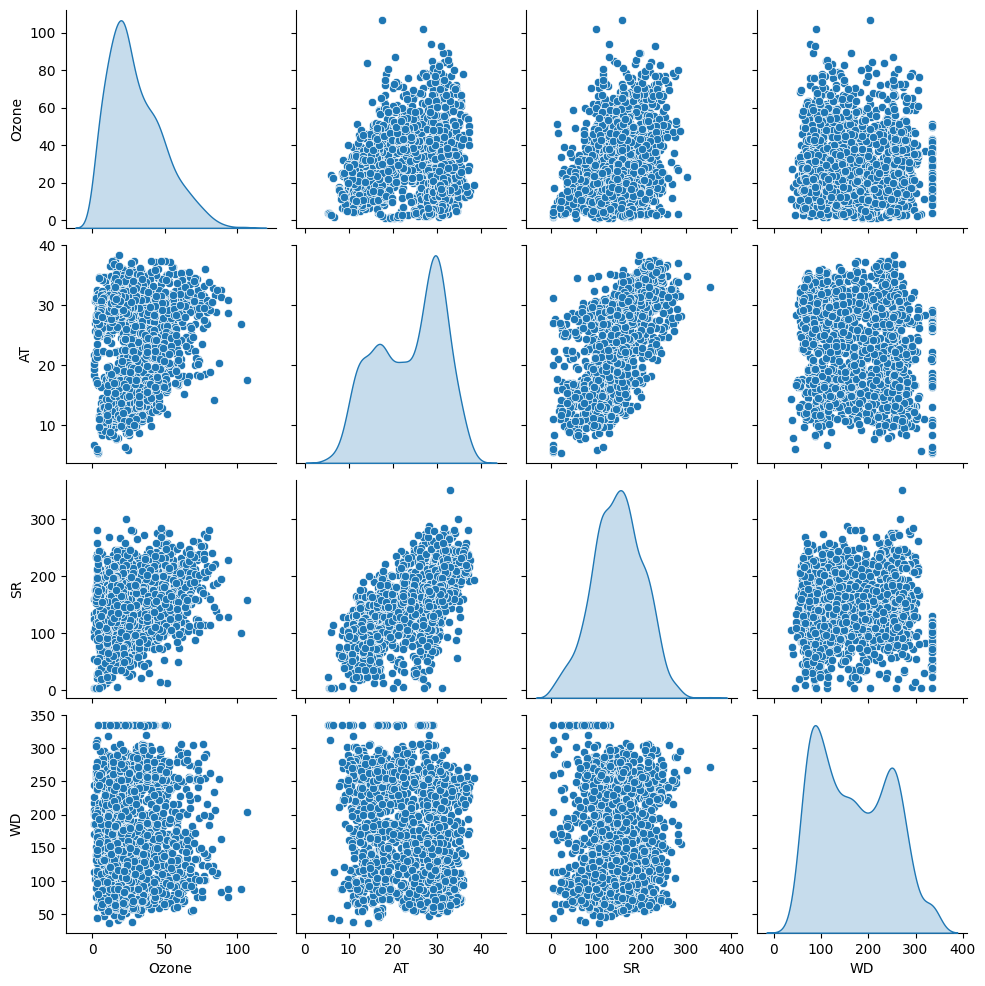

In [80]:
# pair plot
sns.pairplot(aq_df[['Ozone','AT','SR','WD']],diag_kind='kde')

In [81]:
aq_corr = aq_df.corr(method='pearson')
aq_corr

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18884\3625423209.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,...,RH,WD,SR,BP,AT,Xylene,TOT-RF,month,year,day
PM2.5,1.000000,0.882006,0.611697,0.646553,0.709611,0.312937,0.258731,0.551987,0.066403,0.576588,...,0.111838,0.189141,-0.429228,0.580567,-0.559007,0.088954,-0.171898,0.189634,-0.069615,-0.026448
PM10,0.882006,1.000000,0.640087,0.625935,0.716982,0.265630,0.429606,0.508066,0.175784,0.508906,...,-0.189197,0.244916,-0.209796,0.423613,-0.322683,0.087742,-0.229743,0.133959,-0.041996,-0.010634
NO,0.611697,0.640087,1.000000,0.556565,0.903508,0.191508,0.203196,0.500371,-0.019257,0.391409,...,0.087260,0.110843,-0.252661,0.387924,-0.362094,0.134409,-0.107608,0.185646,-0.093602,0.014552
NO2,0.646553,0.625935,0.556565,1.000000,0.858668,0.359021,0.526737,0.395444,0.125992,0.285623,...,0.145038,0.112626,-0.214008,0.528466,-0.394410,0.140449,-0.150967,0.149503,-0.549046,0.004207
Nox,0.709611,0.716982,0.903508,0.858668,1.000000,0.302118,0.396579,0.512508,0.053533,0.386719,...,0.128661,0.126659,-0.266196,0.512163,-0.426954,0.153708,-0.144246,0.191316,-0.340005,0.011930
NH3,0.312937,0.265630,0.191508,0.359021,0.302118,1.000000,0.176568,0.258033,0.011802,0.302392,...,0.058234,0.072273,-0.151588,0.102590,-0.134754,0.037954,-0.070144,0.107427,-0.273361,-0.020173
SO2,0.258731,0.429606,0.203196,0.526737,0.396579,0.176568,1.000000,0.115600,0.417414,0.073016,...,-0.350761,0.036936,0.208442,0.174129,0.019880,0.122580,-0.145360,-0.218852,-0.391775,-0.008327
CO,0.551987,0.508066,0.500371,0.395444,0.512508,0.258033,0.115600,1.000000,0.104532,0.313568,...,0.022524,0.121956,-0.236824,0.284975,-0.319518,0.038337,-0.088784,0.087072,-0.035661,0.002757
Ozone,0.066403,0.175784,-0.019257,0.125992,0.053533,0.011802,0.417414,0.104532,1.000000,0.183145,...,-0.425309,0.043237,0.273020,0.017112,0.118819,0.026307,-0.125978,-0.115081,-0.084528,-0.023171
Benzene,0.576588,0.508906,0.391409,0.285623,0.386719,0.302392,0.073016,0.313568,0.183145,1.000000,...,0.128264,0.159741,-0.362264,0.331685,-0.454111,0.102327,-0.113402,0.099294,0.169105,-0.003579


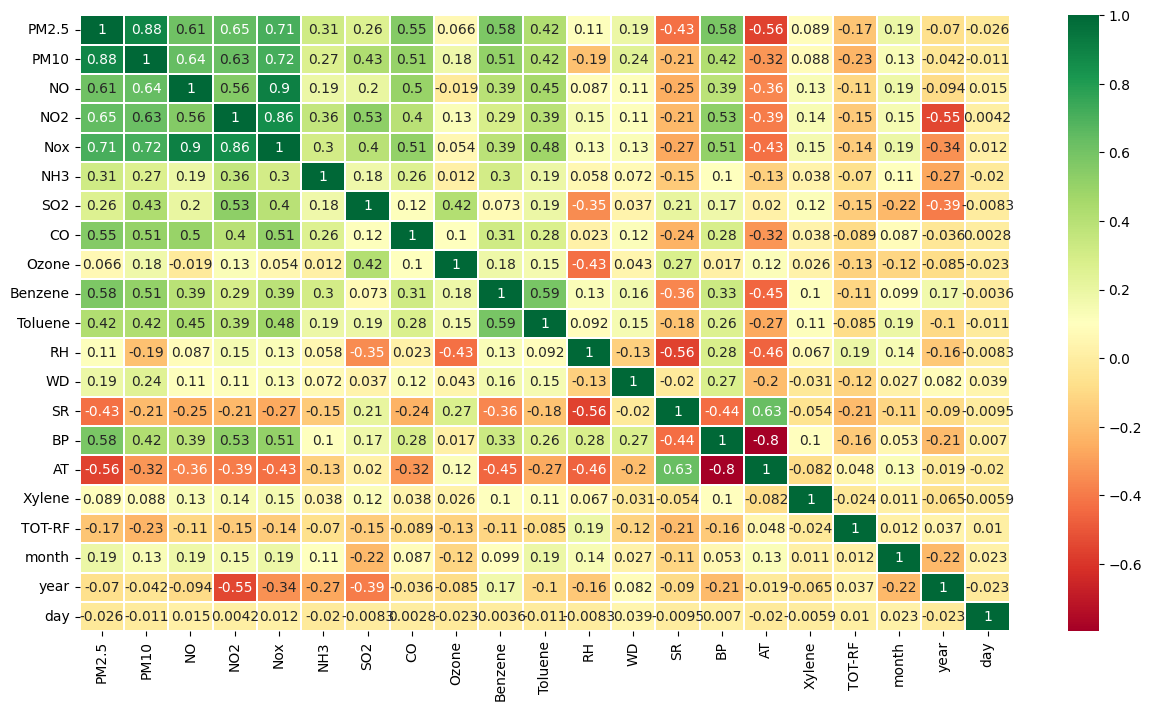

In [82]:
g = sns.heatmap(aq_corr,annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [83]:
# # auto correlation
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(aq_df['Ozone'].resample('1y').mean())